<a href="https://colab.research.google.com/github/ShivamVerma14/Data-Mining/blob/main/Practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q1. Create a file “people.csv” with the following data:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### i. Read the data from the file “people.csv”.

In [ ]:
path = '/content/drive/MyDrive/College Work/Data Mining/people.csv'
data = pd.read_csv(path)

data

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


### Create a ruleset E that contain rules to check for the following conditions:
1. The age should be in the range 0-150.
2.	The age should be greater than yearsmarried.
3.	The status should be married or single or widowed.
4.	If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult, if age is more than 65 the agegroup should be elderly.


In [ ]:
def ruleset(data):
    data['Rule1'] = data['Age'].apply(lambda x: x in range(0, 150))
    data['Rule2'] = data.apply(lambda x: x.Age > x.yearsmarried, axis=1)
    data['Rule3'] = data['status'].apply(lambda x: x in {'married', 'single', 'widowed'})
    data['Rule4'] = data.apply(lambda x: (x.Age < 18 and x.agegroup == 'child') or (18 <= x.Age <= 65 and x.agegroup == 'adult') or (x.Age > 65 and x.agegroup == 'elderly'), axis=1)

### iii. Check whether ruleset E is violated by the data in the file people.csv

In [ ]:
ruleset(data)

data

,Age,agegroup,height,status,yearsmarried,Rule1,Rule2,Rule3,Rule4
0,21,adult,6.0,single,-1,True,True,True,True
1,2,child,3.0,married,0,True,True,True,True
2,18,adult,5.7,married,20,True,False,True,True
3,221,elderly,5.0,widowed,2,False,True,True,True
4,34,child,-7.0,married,3,True,True,True,False


### iv. Summarize the results obtained in part (iii).

In [ ]:
summary = data.loc[:, 'Rule1':'Rule4'].replace({True:1, False:0})

summary

,Rule1,Rule2,Rule3,Rule4
0,1,1,1,1
1,1,1,1,1
2,1,0,1,1
3,0,1,1,1
4,1,1,1,0


### v. Visualize the results obtained in part (iii).

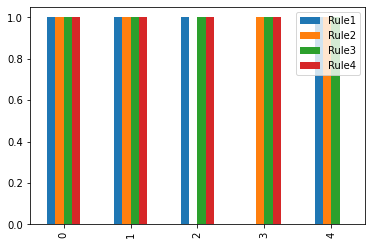

In [ ]:
summary.plot(kind='bar')
plt.show()